In [40]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from matplotlib.gridspec import GridSpec
from matplotlib import cm, colors
import pickle

In [41]:
df = pd.read_csv('/home/ryley/WDK/ML/dataset/komegasst_fp_phll.csv')

[[ 3.36459e+00  1.27957e+00  8.46311e-03 -1.15119e-02  3.31310e-05
  -6.60551e-02 -7.73657e-02]
 [ 4.11742e+00  3.05680e+00  3.10261e-03 -2.77384e-03  1.92355e-06
  -2.70146e-01 -1.33687e-01]
 [ 2.85902e-03  3.95406e+00  6.72055e-06 -6.72049e-06  1.12912e-11
  -2.63063e-06 -2.92565e-06]
 [ 1.84558e+00  1.11319e-01  4.50492e-02 -4.78367e-02  5.72088e-04
  -2.01646e-02 -2.04926e-02]
 [ 2.15190e+00  1.00640e+00  5.17185e-03 -4.61413e-03  5.32255e-06
  -4.73295e-02 -6.80449e-02]]
Model iterations: 23
[2 4]
2


/home/ryley/WDK/ML/code/training/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/ryley/WDK/ML/code/training/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/tmp/ipykernel_23252/3927032942.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Set1")
/home/ryley/WDK/ML/code/training/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/ryley/WDK/ML/code/training/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without fe

[2 4]
2
[2 4]
2


/home/ryley/WDK/ML/code/training/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/tmp/ipykernel_23252/3927032942.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Set1")


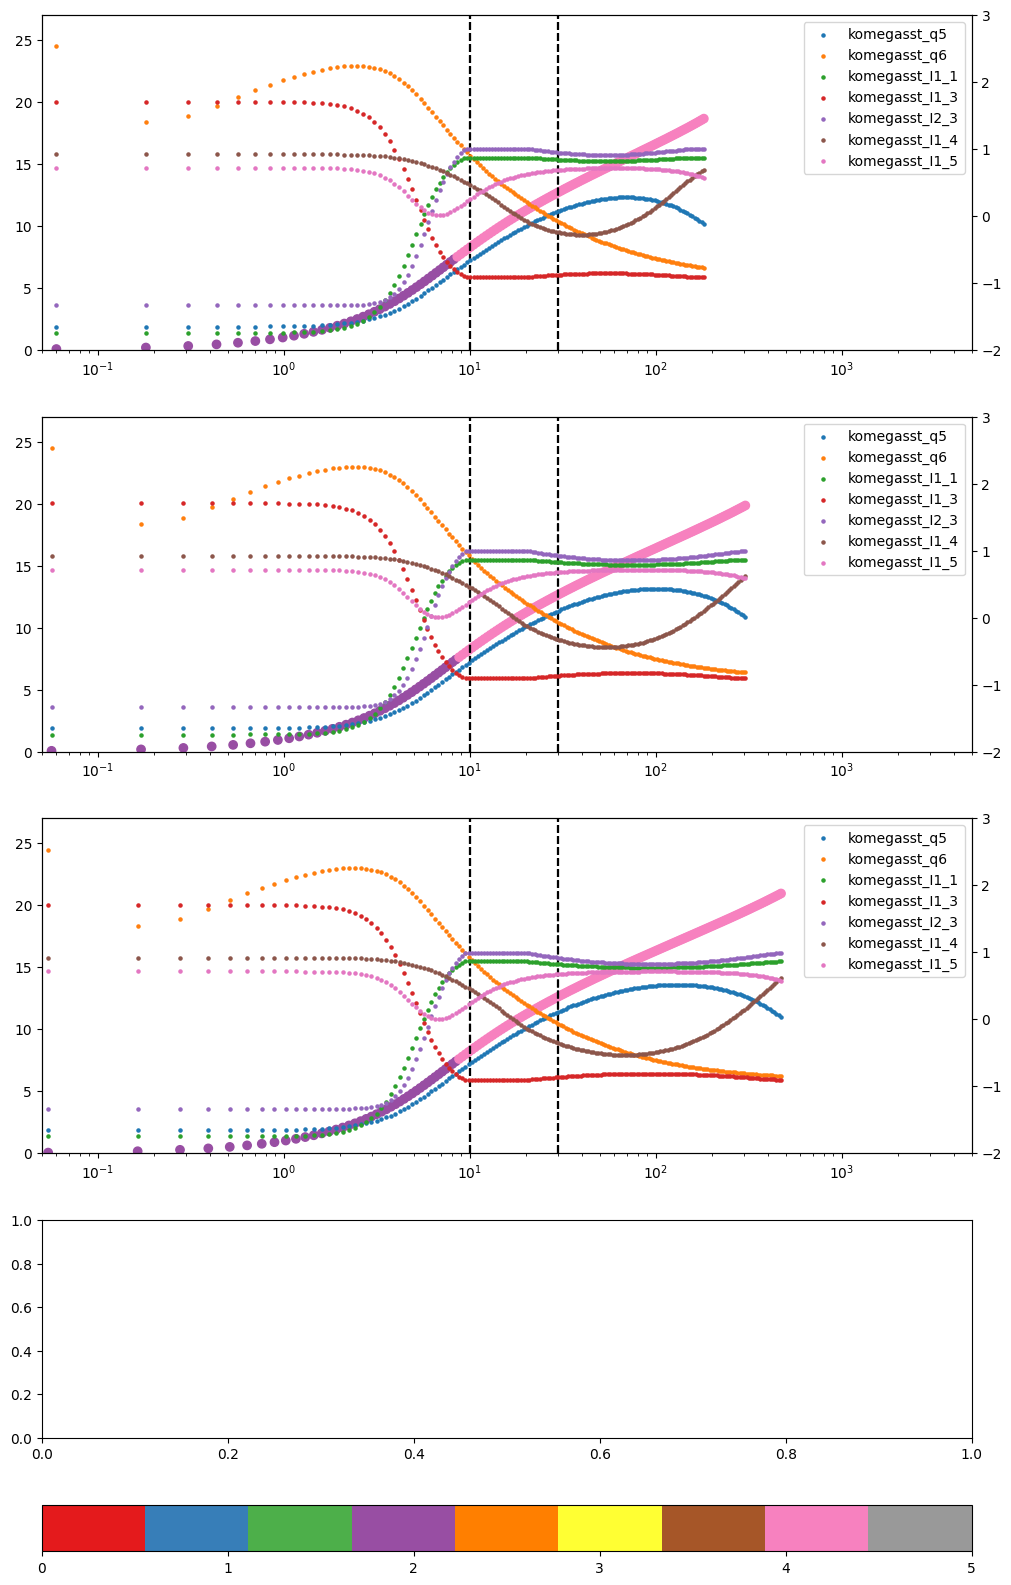

In [42]:
#input_features = ['komega_I1_1','komega_I1_3','komega_I1_5','komega_q2']#'komega_I1_2']#,'komega_I1_2','komega_I1_3','komega_I1_5','komega_q2']
input_features = [
#'komegasst_I1_1','komegasst_I1_3','komegasst_I1_5','komegasst_q5','komegasst_q6']
#'komegasst_I1_1','komegasst_I1_3','komegasst_I1_5','komegasst_q5','komegasst_q6','komegasst_q9']
#'komegasst_q5','komegasst_I1_1','komegasst_I1_3','komegasst_I2_3','komegasst_I1_5']
'komegasst_q5','komegasst_q6','komegasst_I1_1','komegasst_I1_3','komegasst_I2_3','komegasst_I1_4','komegasst_I1_5',]

cases = ['case_0p5','case_0p8','case_1p5','fp_1410','fp_4060']
#cases = ['case_0p5','case_0p8','case_1p5','fp_1000', 'fp_1410', 'fp_2540', 'fp_3030', 'fp_3270','fp_4060']

n_comp = 5
X = np.empty((len(cases)*100, len(input_features)))
for i, case in enumerate(cases):
    df_i = df[df.Case == case][input_features]
    X[i*100:(i+1)*100,:] = df_i.sample(n= 100).to_numpy()

print(X[0:5])
#X = df[df.Case.isin(cases)][input_features]
scaler = StandardScaler()
X = scaler.fit_transform(X)
#model = KMeans(n_clusters=4)
model = GaussianMixture(n_components=n_comp, random_state=0)
model.fit(X)
pickle.dump(model,open('models/splitr/splitr.pkl', 'wb'))
pickle.dump(scaler,open('models/splitr/splitr_scaler.pkl','wb'))
print(f'Model iterations: {model.n_iter_}')
fig, axs = plt.subplots(4,1, figsize=(12,20))
for i, case in enumerate(['fp_1410','fp_2540','fp_4060']):
    df_case = scaler.transform(df[df.Case == case][input_features])
    yplus = np.load(f'/home/ryley/WDK/ML/dataset/numpy/komegasst/komegasst_{case}_yplus.npy')
    Uplus = np.load(f'/home/ryley/WDK/ML/dataset/numpy/komegasst/komegasst_{case}_Uplus.npy')[:,0]

    y = model.predict(scaler.transform(df[df.Case==case][input_features]))
    clusters = np.unique(y)
    print(clusters)
    #y = np.interp(y, (0, n_comp), (0, 1))
    norm = colors.Normalize(0, n_comp)
    print(len(clusters))
    #Cx = df[df.Case == case]['komegasst_C_1']
    #Cy = df[df.Case == case]['komegasst_C_2']
    cmap = cm.get_cmap("Set1")
    axs[i].scatter(yplus,Uplus,c=cmap(norm(y)))
    axs2 = axs[i].twinx()
    for i,feature in enumerate(input_features):
        axs2.scatter(yplus,df_case[:,i],label=feature,s=5)
    axs2.legend()
    axs2.set_ylim([-2,3])
    
    #for cluster in clusters:    
    #    row_ix = np.where(y == cluster)
    #    axs[i].scatter(Cx.values[row_ix], Cy.values[row_ix],s=1.5)
    for ax in axs[0:-1]:
        ax.semilogx()
        ax.set_ylim([0,27])
        ax.set_xlim([5E-2,5E3])

        ax.plot([10,10],[0,30],'k--')
        ax.plot([30,30],[0,30],'k--')
        
fig.colorbar(cm.ScalarMappable(norm=norm,cmap=cmap),orientation='horizontal',pad=0.2, ax=axs[-1])
fig.savefig('models/splitr/splitr_fp.png',dpi=300)


/home/ryley/WDK/ML/code/training/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/tmp/ipykernel_23252/2576033151.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Set1")
/home/ryley/WDK/ML/code/training/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/tmp/ipykernel_23252/2576033151.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Set1")
/home/ryley/WDK/ML/code/training/lib/python3.10/site-package

[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]


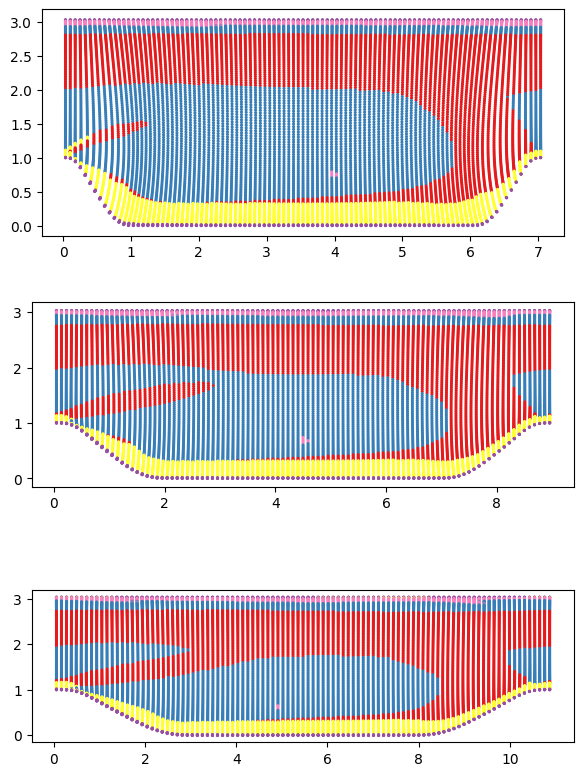

In [43]:
fig, axs = plt.subplots(3,1, figsize=(7,10))
for i, case in enumerate(['case_0p5','case_1p0','case_1p5']):
    y = model.predict(scaler.transform(df[df.Case==case][input_features]))
    clusters = np.unique(y)
    print(clusters)
    norm = colors.Normalize(0, n_comp)
    cmap = cm.get_cmap("Set1")

    #y = np.interp(y, (0, n_comp), (0, 1))

    Cx = df[df.Case == case]['komegasst_C_1']
    Cy = df[df.Case == case]['komegasst_C_2']
    axs[i].scatter(Cx.values, Cy.values,s=1.5,c=cmap(norm(y)))
    for ax in axs:
        ax.set_aspect(1)
fig.savefig('models/splitr/splitr_phll.png',dpi=300)


/home/ryley/WDK/ML/code/training/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/ryley/WDK/ML/code/training/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/ryley/WDK/ML/code/training/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/ryley/WDK/ML/code/training/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


[2 2 2 ... 2 2 2]
[0 1 2 3 4]
[2 2 2 ... 2 2 2]
[0 1 2 3 4]


/home/ryley/WDK/ML/code/training/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/ryley/WDK/ML/code/training/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/ryley/WDK/ML/code/training/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


[2 2 2 ... 2 2 2]
[0 1 2 3 4]
(array([0, 1, 2, 3, 4]), array([23725, 24590,  5487, 15111,  6238]))


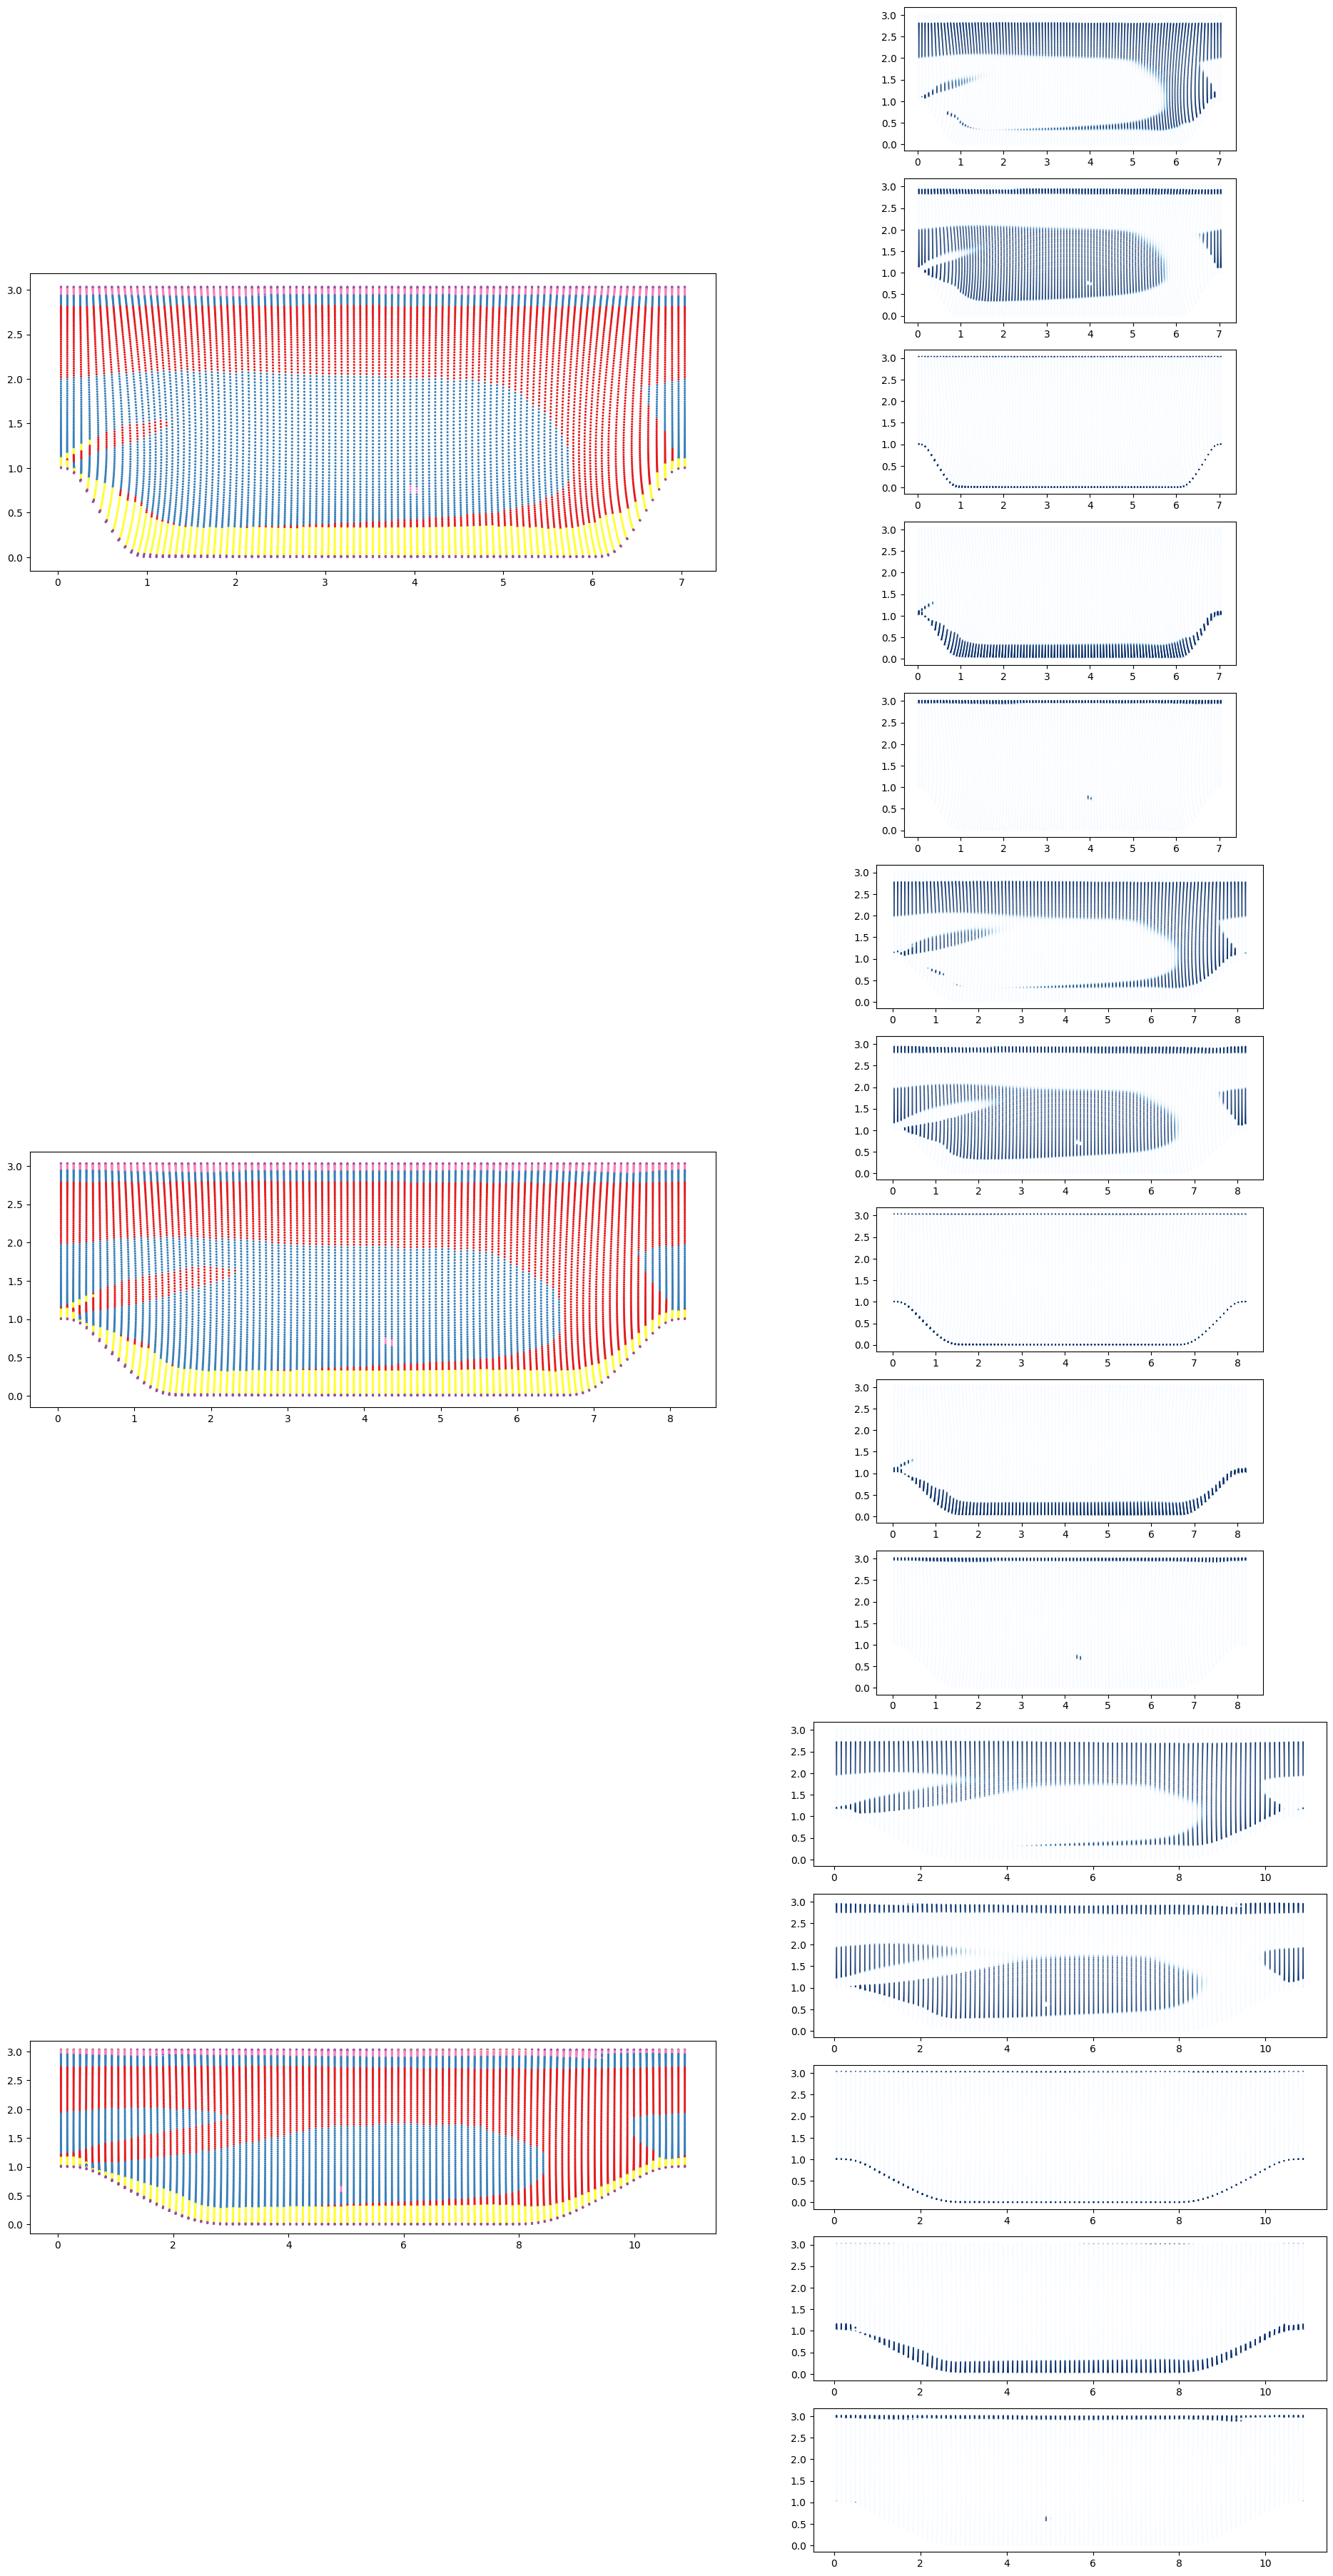

In [44]:
fig = plt.figure(layout="tight",figsize=(20,60))

gs = GridSpec(5*n_comp, 2, figure=fig)

for i, case in enumerate(['case_0p5','case_0p8','case_1p5']):
    y = model.predict(scaler.transform(df[df.Case==case][input_features]))
    probab = model.predict_proba(scaler.transform(df[df.Case==case][input_features]))
    print(y)
    clusters = np.unique(y)
    print(clusters)
    Cx = df[df.Case == case]['komegasst_C_1']
    Cy = df[df.Case == case]['komegasst_C_2']
    ax_clusters = fig.add_subplot(gs[i*n_comp:(i+1)*n_comp,0])
    ax_clusters.scatter(Cx.values, Cy.values,s=1.5,c=cmap(norm(y)))
    ax_clusters.set_aspect(1)
    for cluster in clusters:    
        row_ix = np.where(y == cluster)
        #ax_clusters.scatter(Cx.values[row_ix], Cy.values[row_ix],s=3.0)
        ax_probab = fig.add_subplot(gs[(i*n_comp+cluster),1])
        ax_probab.scatter(Cx.values, Cy.values,s=0.2, c=probab[:,cluster],cmap='Blues')
        ax_probab.set_aspect(1)
    # create scatter of these samples

y = model.predict(scaler.transform(df[input_features]))
print(np.unique(y, return_counts=True))
fig.savefig('models/splitr/splitr_probab.png',dpi=300)


In [45]:
df['Cluster'] = model.predict(scaler.transform(df[input_features]))
probs = model.predict_proba(scaler.transform(df[input_features]))

for i in range(n_comp):
    df[f'Probability_cluster_{i}'] = probs[:,i]


/home/ryley/WDK/ML/code/training/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/ryley/WDK/ML/code/training/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [46]:
df.to_csv('/home/ryley/WDK/ML/dataset/komegasst_split.csv')

In [47]:
print(df['Probability_cluster_7'][50000])

KeyError: 'Probability_cluster_7'

In [ ]:
probs = model.predict_proba(X)

probs = model.predict_proba(np.array([0,0,1E9,0,-1E5,0]).reshape(1,-1))

ValueError: X has 6 features, but GaussianMixture is expecting 7 features as input.